<a href="https://colab.research.google.com/github/sagartv/diabetes_risk_predictor/blob/main/diabetes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.width = None


Obtain dataset diabetes_binary_health_indicators_BRFSS2015.csv from:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_health_indicators_BRFSS2015.csv

In [2]:
db = pd.read_csv('/content/drive/MyDrive/diabetes_project/diabetes_binary_health_indicators_BRFSS2015.csv')



# Exploratory Data Analysis

In [3]:
db.head(3)



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [4]:
db.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
db.shape

(253680, 22)

In [6]:
db.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

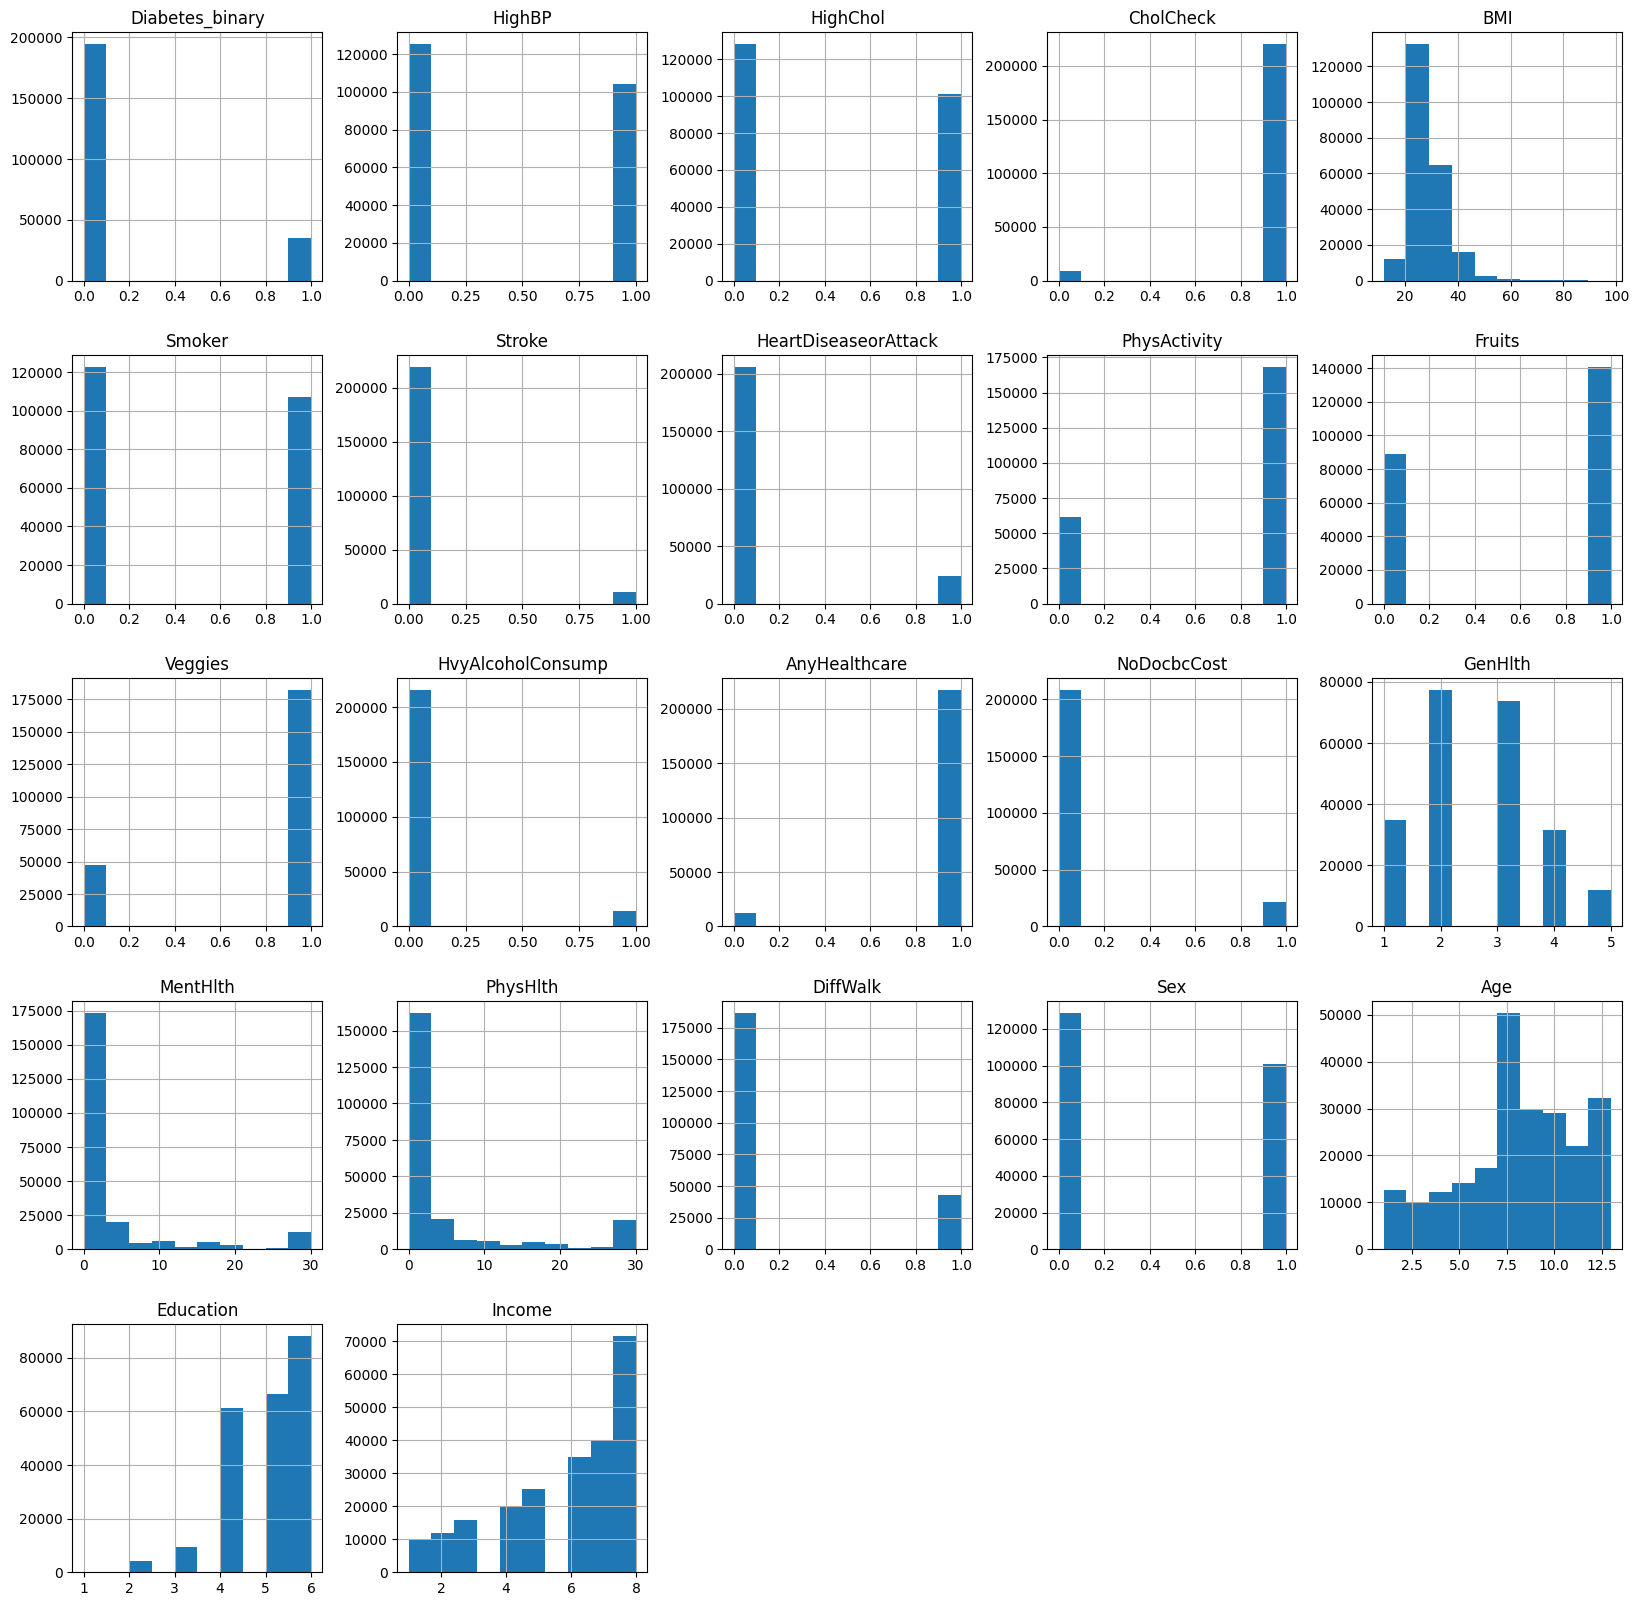

In [7]:
db.drop_duplicates(inplace = True)
db.hist(figsize = (20,20))

Plotting correlation heatmap.
Approach from kaggle notebook: https://www.kaggle.com/code/bharat04/diabetes-detailed-eda-with-conclusion

Text(0.5, 1.0, 'Correlation of Features')

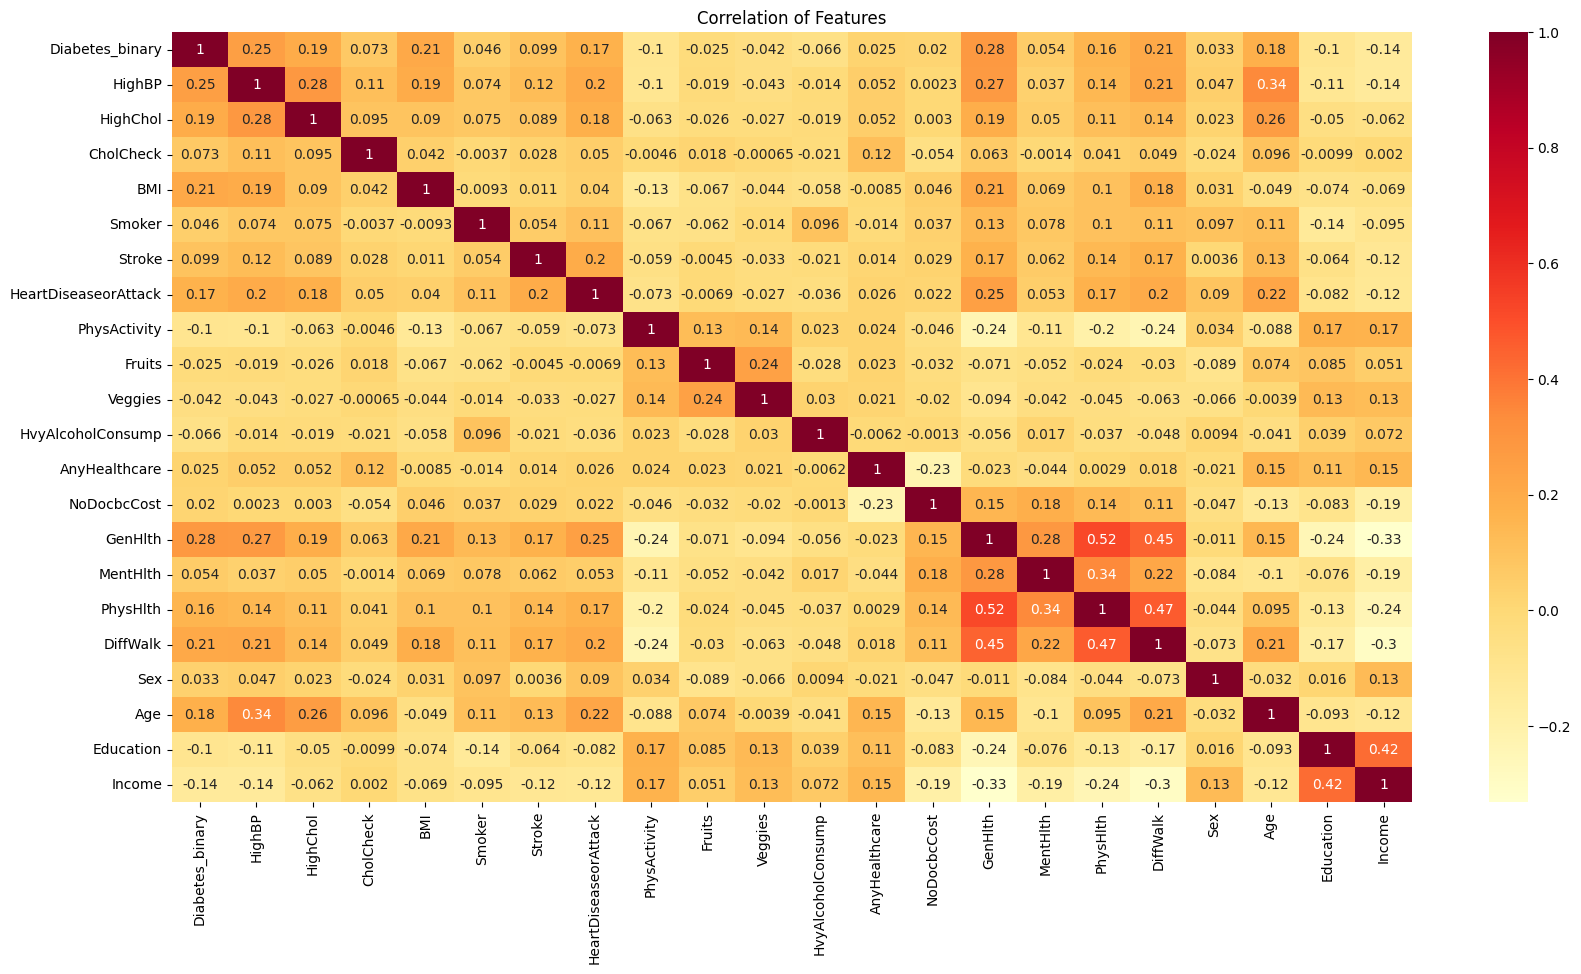

In [8]:


plt.figure(figsize = (20,10))
sns.heatmap(db.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of Features")

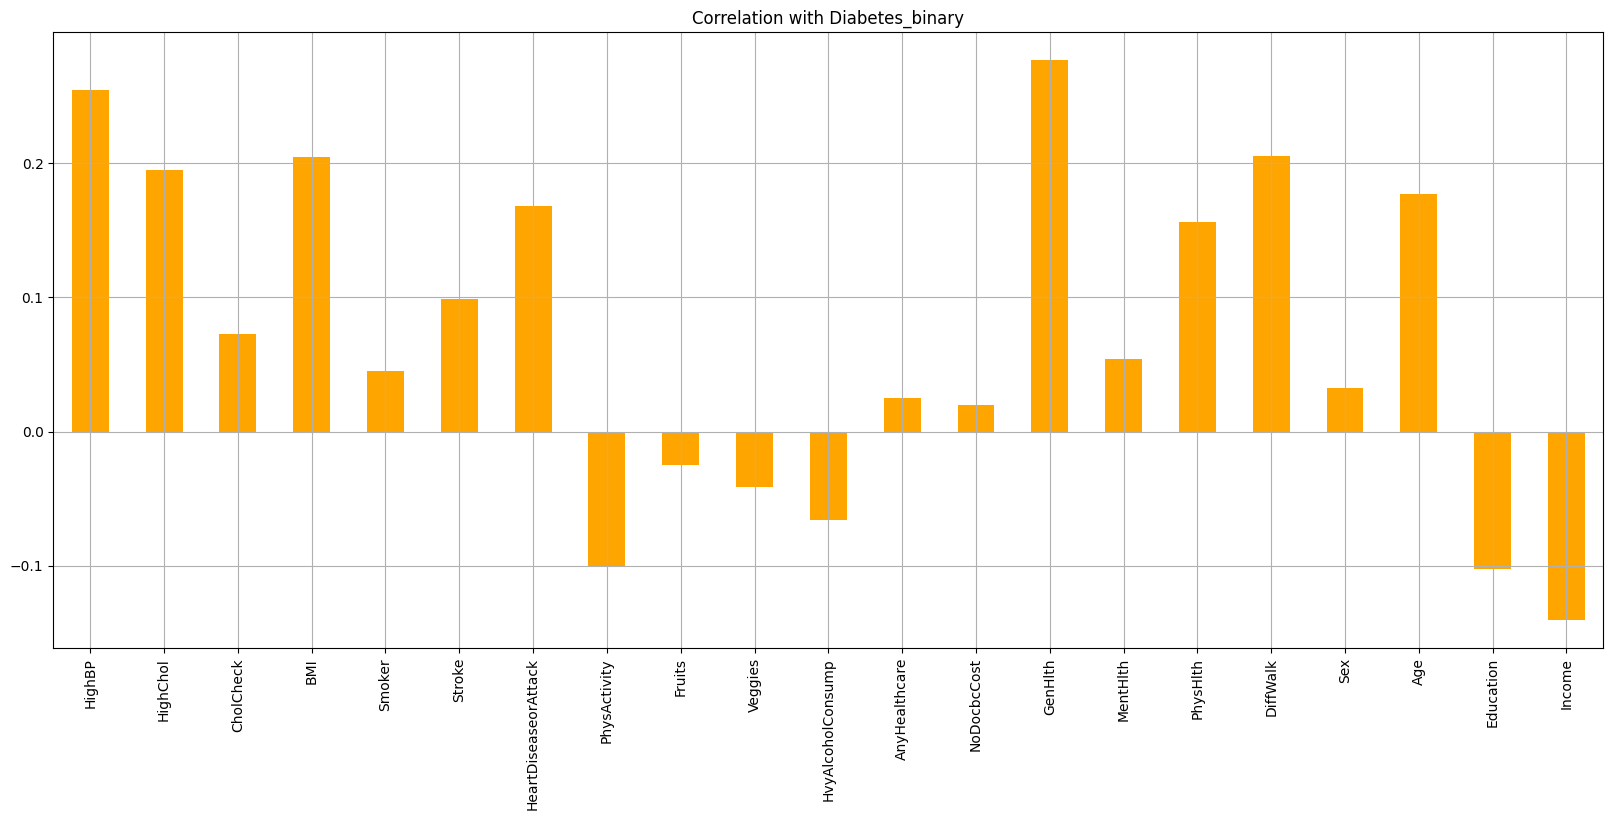

In [9]:
db.drop('Diabetes_binary', axis=1).corrwith(db.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Orange");

#Feature Selection
Selecting K Best features using Chi Squared analysis
Approach from: https://www.kaggle.com/code/abdallahsaadelgendy/diabetes-prediction-eda-preprocessing-models#Data-Splitting

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification


X = db.iloc[:,1:]
Y = db.iloc[:,0]


#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8098.548237
1,HighChol,4869.312739
2,CholCheck,48.904140
3,BMI,15507.736174
4,Smoker,253.826098
5,Stroke,2156.678382
6,HeartDiseaseorAttack,5822.145697
7,PhysActivity,617.563886
8,Fruits,54.688897
9,Veggies,82.098846


In [11]:
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135


In [14]:
# droppable_columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
# db.drop(columns = droppable_columns, inplace = True)












# Splitting Data


In [15]:
features = db.iloc[:,1:]
labels = db.iloc[:,0]
print(features.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(features,labels, test_size=0.3 , random_state=42)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 180)

# pipeline = Pipeline(steps =
#  [('model', model)])
pipeline = model




In [18]:
from sklearn import set_config

set_config(display='diagram')
display(pipeline)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy
instance = X_test
predict_probs = pipeline.predict_proba(instance)
print("Probabilities", (predict_probs))











Model score: 0.8515172203419374
Probabilities [[0.99005187 0.00994811]
 [0.98467696 0.01532307]
 [0.942843   0.05715697]
 ...
 [0.879565   0.12043497]
 [0.5578145  0.4421855 ]
 [0.8965931  0.10340693]]


# Balancing the Imbalanced Dataset

Imbalanced Dataset balanced using SMOTEENN methods. Source:
https://www.kaggle.com/code/jorgemetri/94-accuracy-with-smoteenn-resampling

SMOTEENN is an under/oversampling method that introduce new observations in the minority class and delete redundant observations in the majority class; it uses the k-nearest neighbors to interpolate the new data points

In [20]:
import imblearn
from imblearn.combine import SMOTEENN
resampler = SMOTEENN(sampling_strategy = 'all',random_state = 123, n_jobs = -1)
resampler.fit(X,Y)

Xr, yr = resampler.fit_resample(X,Y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


## Compare the distribution of classes before and after Resampling

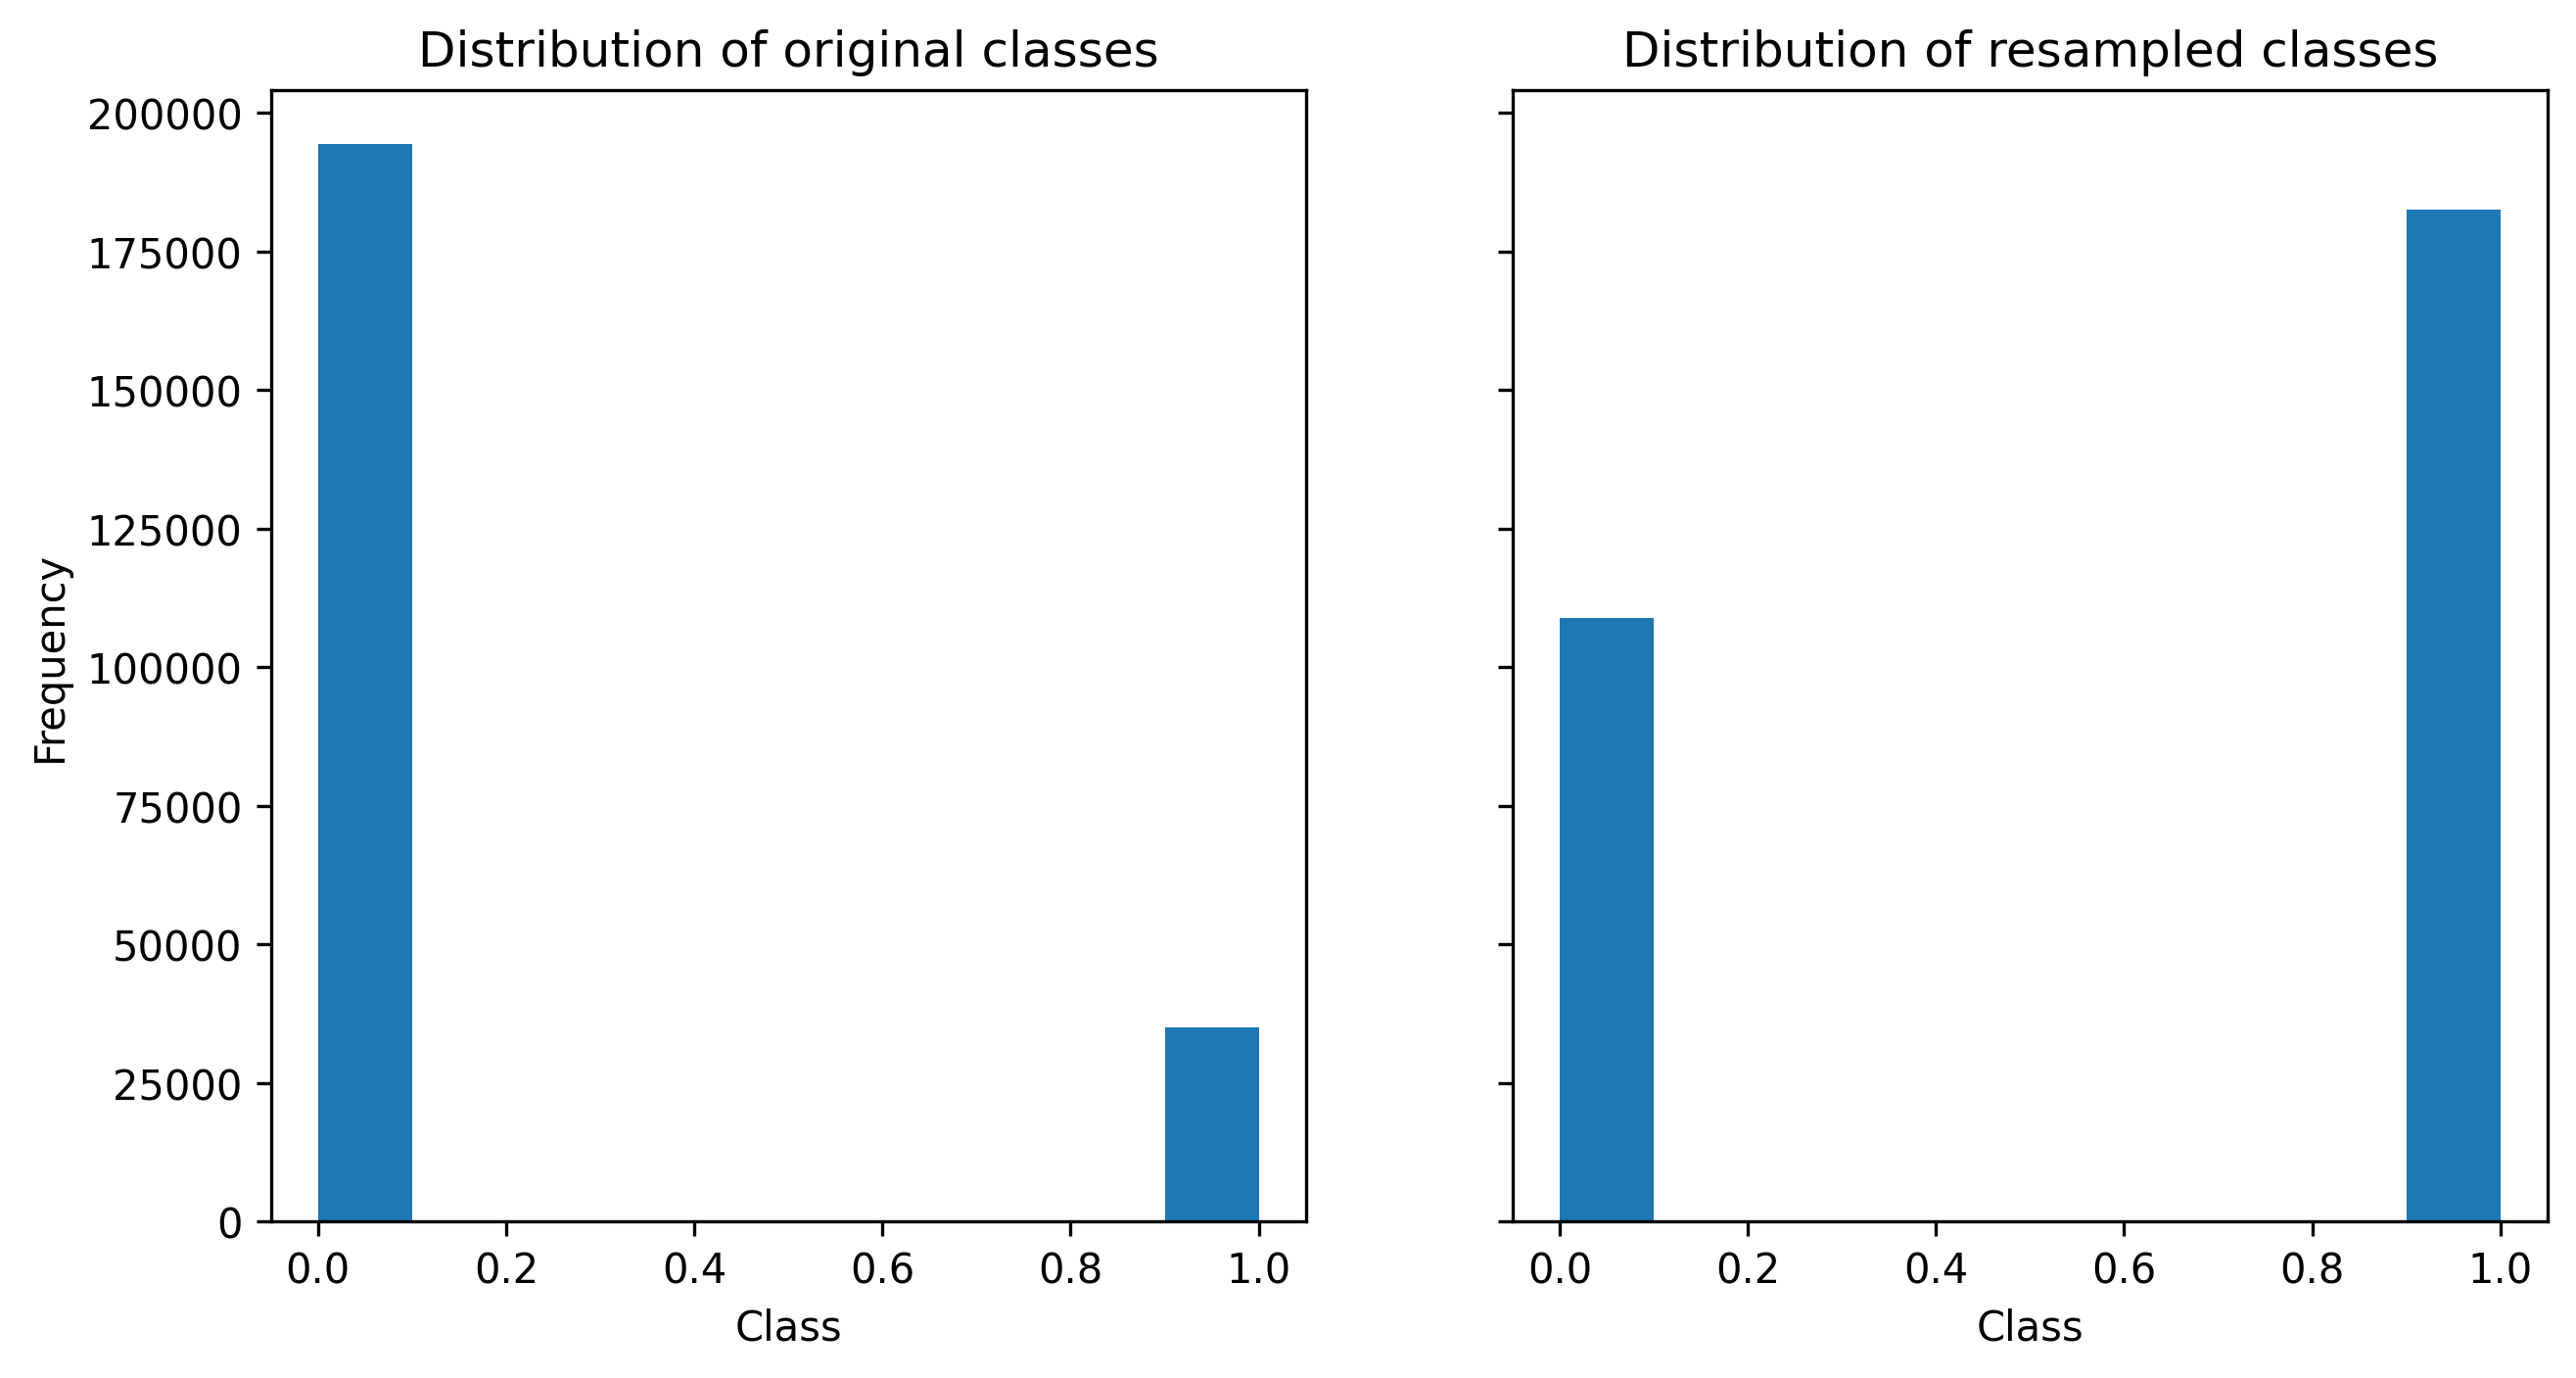

In [21]:
fig, ax = plt.subplots(1,2, figsize =(10,5), sharey = True, dpi = 300)
ax[0].hist(Y)
ax[1].hist(yr)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Class')
ax[1].set_xlabel('Class')
ax[0].set_title('Distribution of original classes')
ax[1].set_title('Distribution of resampled classes')
plt.show()

# Check Model Performance on Resampled Data

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Xr,yr, test_size=0.3 , random_state=42)

In [23]:
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy


Model score: 0.9430510103668444


# HyperParameter Fine-Tuning

In [24]:
parameters = {
    'model__max_depth': range (2, 10, 1),
    'model__n_estimators': range(60, 220, 40),
    'model__learning_rate': [0.1, 0.01, 0.05]
}

In [25]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipeline, parameters, cv=10, n_jobs =10, scoring='roc_auc' )
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

# Obtain Classification Report

In [26]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
report2 = classification_report(y_test, y_pred, output_dict = True)
report2 = pd.DataFrame(report2)
report2.head()


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.909848,0.963811,0.943051,0.936829,0.943721
recall,0.940189,0.944748,0.943051,0.942469,0.943051
f1-score,0.924770,0.954184,0.943051,0.939477,0.943234
support,32536.000000,54858.000000,0.943051,87394.000000,87394.000000


# Train Model on Entire Dataset

In [27]:
pipeline.fit(Xr, yr)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Evaluate Model Performance on 50-50 split dataset
available at: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

In [28]:


split_db = pd.read_csv('/content/drive/MyDrive/diabetes_project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# droppable_columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
# split_db.drop(columns = droppable_columns, inplace = True)

X_test_2 = np.array(split_db.iloc[:, 1:])
y_test_2 = np.array(split_db.iloc[:, 0])
y_pred_2 = pipeline.predict(X_test_2)

report3 = classification_report(y_test_2, y_pred_2, output_dict = True)
report3 = pd.DataFrame(report2)
report3.head()



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.909848,0.963811,0.943051,0.936829,0.943721
recall,0.940189,0.944748,0.943051,0.942469,0.943051
f1-score,0.924770,0.954184,0.943051,0.939477,0.943234
support,32536.000000,54858.000000,0.943051,87394.000000,87394.000000


# Save Model by Pickling

In [29]:
# Use pickle to save model for next usage.
import pickle
filename = 'diabetes_model_v2.pk'
with open('./'+filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Load Model

In [ ]:
with open('./'+filename ,'rb') as f:
    loaded_model = pickle.load(f)
loaded_model.predict(X_test)